<a href="https://colab.research.google.com/github/tiagoflorin/DataScience1/blob/Clase_9/Copia_de_Clase_act1_U9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pequeño asistente virtual

## Texto a audio

In [ ]:
!pip install gTTS

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from gtts import gTTS
from IPython.display import Audio
tts = gTTS('hola David como estás',lang='es')
tts.save('1.wav')
sound_file = '1.wav'
Audio(sound_file, autoplay=True)

In [ ]:
from gtts import gTTS
from IPython.display import Audio
tts = gTTS('hello David how are you?',lang='en')
tts.save('1.wav')
sound_file = '1.wav'
Audio(sound_file, autoplay=True)

# Clima

In [ ]:
import requests
from bs4 import BeautifulSoup

# Ciudad de Argentina
city = "Buenos Aires"

# creating url and requests instance
url = "https://www.google.com/search?q="+"weather"+city
html = requests.get(url).content

# Obtener la data
soup = BeautifulSoup(html, 'html.parser')
temp = soup.find('div', attrs={'class': 'BNeawe iBp4i AP7Wnd'}).text
str = soup.find('div', attrs={'class': 'BNeawe tAd8D AP7Wnd'}).text

# Formatear la data
data = str.split('\n')
time = data[0]
sky = data[1]

# Obtener todos los tags tipo div
listdiv = soup.findAll('div', attrs={'class': 'BNeawe s3v9rd AP7Wnd'})
strd = listdiv[5].text

# Obtener otros datos interesantes
pos = strd.find('Wind')
other_data = strd[pos:]

# Mostrar la data
print("Temperatura es", temp)
print("Tiempo: ", time)
print("Descripcion del cielo: ", sky)
print(other_data)

Temperatura es 14°C
Tiempo:  Thursday 8:08 pm
Descripcion del cielo:  Clear with periodic clouds
.


# Imagen a texto

In [ ]:
!sudo apt install tesseract-ocr
!sudo apt-get install tesseract-ocr-spa
!pip install pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 29 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (4,884 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

In [ ]:
from google.colab import drive
import os
drive.mount('/content/gdrive')
# Establecer ruta de acceso en dr
import os
print(os.getcwd())
os.chdir("/content/gdrive/My Drive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive


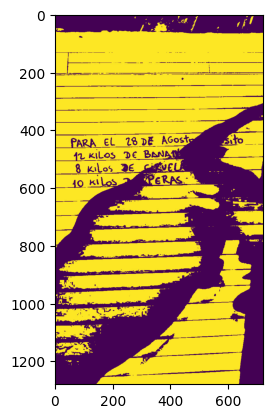

Extracted text:  

 

 

 

 

 

 

 

With PSM 6: ii
PARA EL 18 DÉ Acosta do
nn KIiLos DE BANANME
8 Kalos 3E aúfive LO
10 Kilos EPerOs. "ON Dd
] ss > A , poo a
us A Es - OTE ] A



In [ ]:
import pytesseract
from PIL import Image
import matplotlib.pyplot as plt

# Open the image
try:
    image = Image.open('/content/preprocessed_image.jpg')
    plt.imshow(image)  # Display to confirm it’s loaded
    plt.show()
except Exception as e:
    print(f"Error opening image: {e}")
    exit()

# Extract text
text = pytesseract.image_to_string(image,lang="spa")
print("Extracted text:", text)

# If nothing, try with PSM
if not text.strip():
    text = pytesseract.image_to_string(image, config='--psm 6', lang="spa")
    print("With PSM 6:", text)